In [1]:
import numpy as np
import xarray as xr
import dask.array as daskarray
from matplotlib import pyplot as plt
%matplotlib inline

/Users/rpa/anaconda/envs/geo_scipy/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
plt.rcParams['figure.figsize'] = 14,10

In [2]:
from xmitgcm import open_mdsdataset
import xgcm

In [16]:
iter0 = 0
delta_iter = 72
last_iter = 2808

iters = np.arange(iter0 + delta_iter, last_iter+1, delta_iter)
iters_trend = np.arange(iter0, last_iter+1, delta_iter)

deltaT = 1200

ddir = '/Users/rpa/Code/MITgcm/verification/vermix/tr_run.layers'

ds = open_mdsdataset(ddir, iters=iters, delta_t=deltaT,
            prefix=['DiagLAYERS-TH-diapycnal','DiagLAYERS-TH-transport'])
ds_trend = open_mdsdataset(ddir, iters=iters_trend, delta_t=deltaT,
                prefix=['DiagLAYERS-TH-trend'])

/Users/rpa/RND/Public/xmitgcm/xmitgcm/mds_store.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if iters == 'all':
/Users/rpa/RND/Public/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/Users/rpa/RND/Public/xmitgcm/xmitgcm/mds_store.py:220: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


In [17]:
ds

<xarray.Dataset>
Dimensions:               (XC: 1, XG: 1, YC: 1, YG: 1, Z: 26, Zl: 26, Zp1: 27, Zu: 26, layer_1RHO_bounds: 301, layer_1RHO_center: 300, layer_1RHO_interface: 299, layer_2TH_bounds: 301, layer_2TH_center: 300, layer_2TH_interface: 299, time: 39)
Coordinates:
  * XC                    (XC) >f4 2500.0
  * YC                    (YC) >f4 2500.0
  * XG                    (XG) >f4 0.0
  * YG                    (YG) >f4 0.0
  * Z                     (Z) >f4 -5.0 -15.0 -25.0 -35.0 -45.0 -55.5 -67.0 ...
  * Zp1                   (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 ...
  * Zu                    (Zu) >f4 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 -73.0 ...
  * Zl                    (Zl) >f4 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 ...
    rA                    (YC, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    dxG                   (YG, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    dyG                   (YC, XG) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>

In [29]:
for v in ds.data_vars:
    print('{:>10}: {}'.format(v, ds[v].attrs['long_name']))

   LaUH2TH: Layer Integrated  zonal Transport (UH, m^2/s)
   LaHw2TH: Layer Thickness at U points (m)
   LaPw2TH: Layer Probability at U points [-]
   LaVH2TH: Layer Integrated merid. Transport (VH, m^2/s)
   LaHs2TH: Layer Thickness at V points (m)
   LaPs2TH: Layer Probability at V points [-]
   LaTs2TH: Layer thickness tendency due to THETA surf. forc.
   LaTh2TH: Layer thickness tendency due to THETA horiz. diff.
   LaTz2TH: Layer thickness tendency due to THETA vert. diff.
   LTha2TH: Layer thickness tendency due to THETA horiz. adv.
   LTza2TH: Layer thickness tendency due to THETA vert. adv.
   LTto2TH: Layer thickness tendency due to all THETA terms.


In [18]:
ds_trend

<xarray.Dataset>
Dimensions:               (XC: 1, XG: 1, YC: 1, YG: 1, Z: 26, Zl: 26, Zp1: 27, Zu: 26, layer_1RHO_bounds: 301, layer_1RHO_center: 300, layer_1RHO_interface: 299, layer_2TH_bounds: 301, layer_2TH_center: 300, layer_2TH_interface: 299, time: 40)
Coordinates:
  * XC                    (XC) >f4 2500.0
  * YC                    (YC) >f4 2500.0
  * XG                    (XG) >f4 0.0
  * YG                    (YG) >f4 0.0
  * Z                     (Z) >f4 -5.0 -15.0 -25.0 -35.0 -45.0 -55.5 -67.0 ...
  * Zp1                   (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 ...
  * Zu                    (Zu) >f4 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 -73.0 ...
  * Zl                    (Zl) >f4 0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -61.0 ...
    rA                    (YC, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    dxG                   (YG, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    dyG                   (YC, XG) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>

(6, 9)

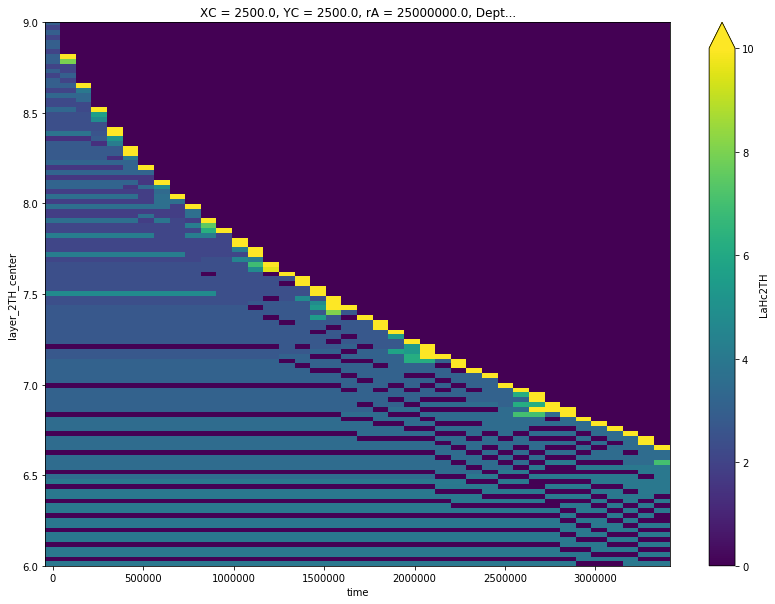

In [45]:
ds_trend.LaHc2TH.transpose().plot(vmax=10)
plt.ylim((6,9))

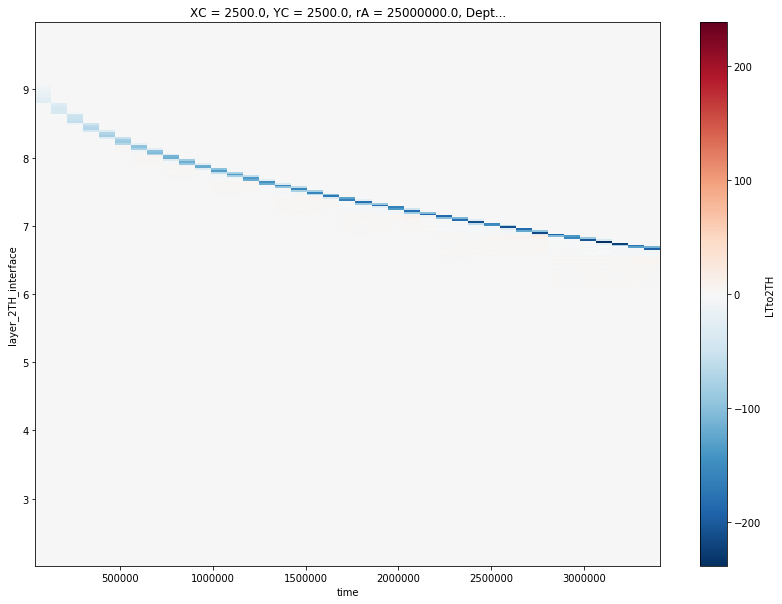

In [22]:
ds.LTto2TH.transpose().plot()

In [36]:
def thickness_budget(ds, ds_trend, layer_name='2TH'):
    """Calculate thickness budget from layers data in xarray format."""
    grid = xgcm.Grid(ds, periodic=['X', 'Y'])    
    dsnew = {}
    
    diapycnal_map = {
        'surface_forcing': (('LaTs',), 1),
        'mixing_vertical': (('LaTz',), 1),
        'mixing_horizontal': (('LaTh',), 1),
        'advection_tendency': (('LTha', 'LTza'), 1),
        'total_tendency': (('LTto',), (24*60*60.)**-1)
    }
    
    for name, (components, scalefac) in diapycnal_map.items():
        if len(components)>1:
            w = sum(*[ds[cpt + layer_name] for cpt in components])
        else:
            w = ds[components[0] + layer_name]
        w_diff = grid.diff(scalefac * w * ds.rA, layer_name, boundary='fill')
        # we want CONVERGENCE, not divergence, so need a minus sign
        dsnew[name + '_' + layer_name] = -w_diff
        
    # we want CONVERGENCE, not divergence, so need a minus sign
    dsnew['advection_flux' + '_' + layer_name] = (
        - grid.diff(ds['LaVH' + layer_name] * ds.dxG, 'Y')
        - grid.diff(ds['LaUH' + layer_name] * ds.dyG, 'X') )
    
    dsnew['thickness_trend' + '_' + layer_name] = (
        ds_trend['LaHc' + layer_name].diff(dim='time', label='upper') /
        ds_trend.time.diff(dim='time', label='upper') ) * ds.rA
    
    dsnew['mixing_numerical' + '_' + layer_name] = (
        dsnew['advection_tendency' + '_' + layer_name] -
        dsnew['advection_flux' + '_' + layer_name] )

    return xr.Dataset(dsnew)

In [37]:
tb = thickness_budget(ds, ds_trend)
tb

<xarray.Dataset>
Dimensions:                 (XC: 1, YC: 1, layer_2TH_center: 300, time: 39)
Coordinates:
  * time                    (time) int64 86400 172800 259200 345600 432000 ...
  * layer_2TH_center        (layer_2TH_center) float32 2.01333 2.04 2.06667 ...
  * YC                      (YC) >f4 2500.0
  * XC                      (XC) >f4 2500.0
    rA                      (YC, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    Depth                   (YC, XC) >f4 dask.array<shape=(1, 1), chunksize=(1, 1)>
    iter                    (time) int64 dask.array<shape=(39,), chunksize=(1,)>
Data variables:
    surface_forcing_2TH     (time, layer_2TH_center, YC, XC) float32 dask.array<shape=(39, 300, 1, 1), chunksize=(1, 1, 1, 1)>
    mixing_vertical_2TH     (time, layer_2TH_center, YC, XC) float32 dask.array<shape=(39, 300, 1, 1), chunksize=(1, 1, 1, 1)>
    mixing_horizontal_2TH   (time, layer_2TH_center, YC, XC) float32 dask.array<shape=(39, 300, 1, 1), chunksize=(1, 1, 1, 1)>
 

(6, 9)

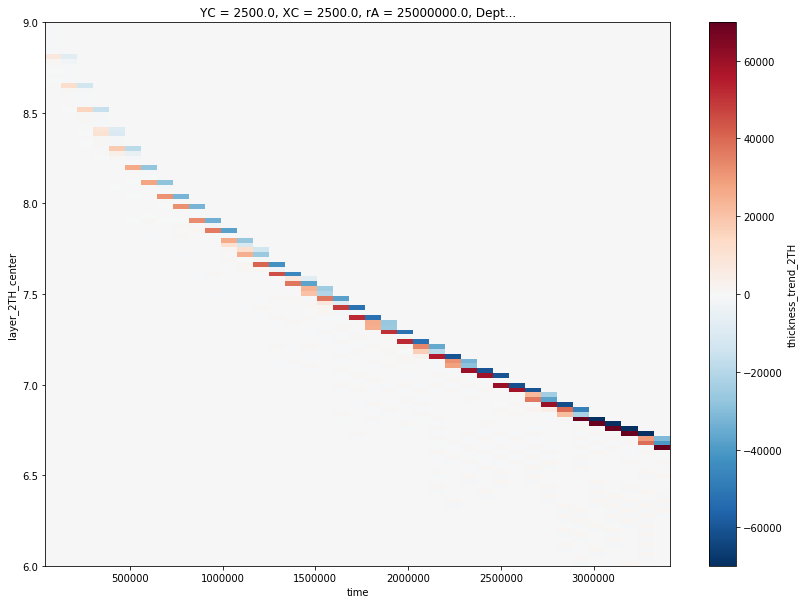

In [41]:
tb.thickness_trend_2TH.transpose().plot()
plt.ylim((6,9))

(6, 9)

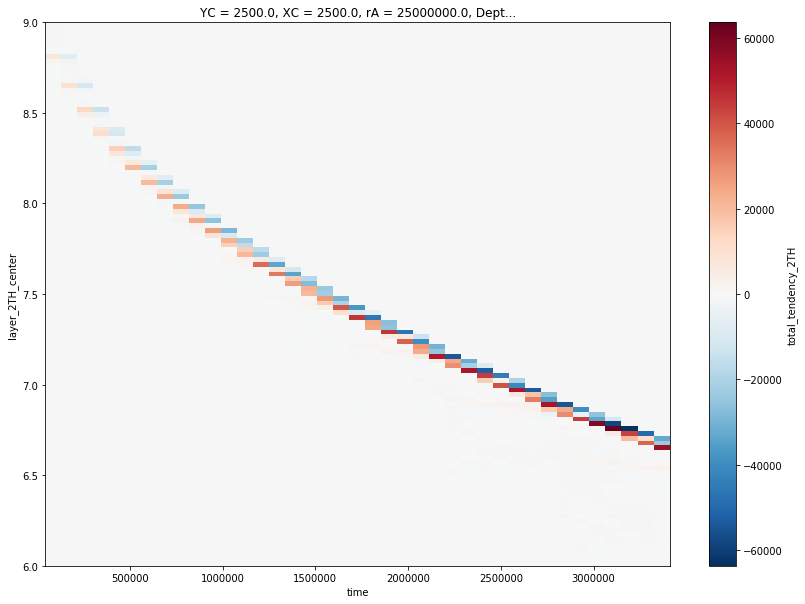

In [42]:
tb.total_tendency_2TH.transpose().plot()
plt.ylim((6,9))

(6, 9)

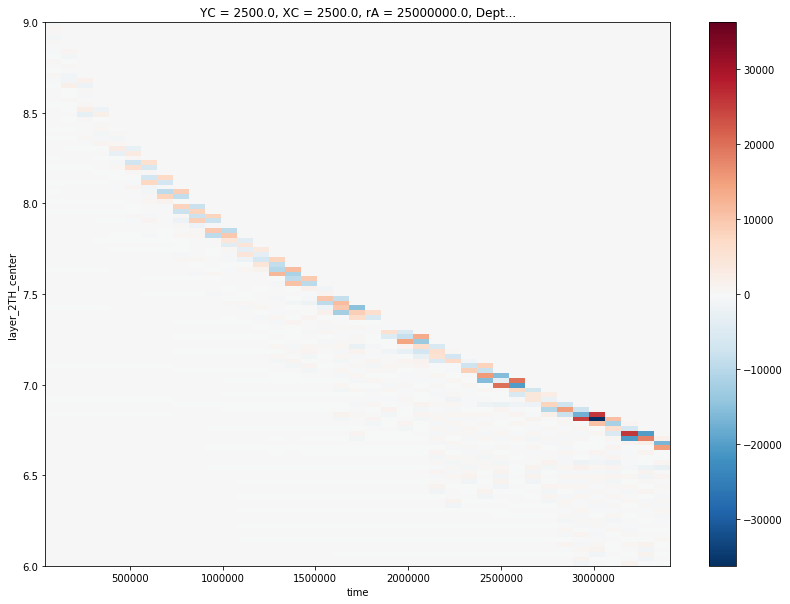

In [44]:
(tb.thickness_trend_2TH - tb.total_tendency_2TH).transpose().plot()
plt.ylim((6,9))